<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP_2022/blob/main/04%20Clasificaci%C3%B3n%20y%20Agrupamiento/notebooks/01-Funciones%20Discriminantes%20%5BResuelto%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación Lineal

La clasificación es un problema de modelación en el cual se predice una etiqueta para cada dato de entrada.

Es decir, se trata de asignar etiquetas a puntos, tratando de predecir las etiquetas reales de los puntos.

* Clasificación Binaria: Dos etiquetas, mutuamente exclusivas.
* Clasificación Multi-clase: Varias etiquetas mutuamente excluyentes.
* Clasificación Multi-etiqueta: Cada instancia tiene varias etiquetas.

&#128214; <u>Referencias bibliográficas</u>:
* Bishop, Christopher M. (2006). Pattern recognition and machine learning. New York. Springer.
* Flach, Peter (2012). Machine Learning: The Art and Science of Algorithms that Make Sense of Data. Cambridge University Press.

Ejemplo de un conjunto de puntos linealmente separables con dos clases.

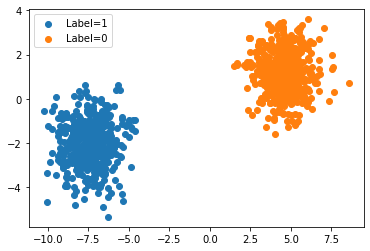

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=2, random_state=28)
counter = Counter(y)

for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=f"Label={str(label)}")
plt.legend()
plt.show()

Ejemplo con tres clases

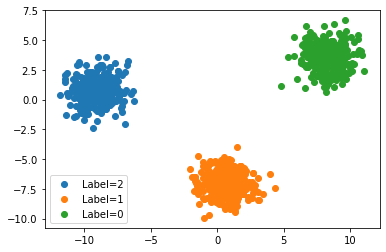

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, 
                centers=3, 
				# random_state=132
				random_state=2809			
				)
counter = Counter(y)

for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=f"Label={str(label)}")
plt.legend()
plt.show()

## Discriminantes de 2 clases

* La función discriminante más simple es la que obtenemos mediante una función lineal del vector de entrada:

$$
y(\textrm{x})=\textrm{w}^\textrm{T}\textrm{x}+w_{0} 
$$

* $\textrm{w}$ es el **vector de pesos**, y $w_0$ es el bias (sesgo / intercepto). 
* A $-w_0$ se le conoce como el **umbral** (_threshold_).
* Un vector de entrada $\textrm{x}$ será asignado a la clase $\mathcal{C}_{1}$ si $y(\textrm{x}) \geq 0$ y a la clase $\mathcal{C}_{2}$ de lo contrario.
* La frontera de decisión (FD) está definida por la relación $y(\textrm{x}) = 0$, que corresponde a un hyperplano de dimensión $(D-1)$ dentro del espacio $D-$dimensional de entrada.
* Para cualesquiera dos puntos $\textrm{x}_A$ y $\textrm{x}_B$ tales que $y(\textrm{x}_A) = y(\textrm{x}_B) = 0$, se tiene que $\textrm{w}^\textrm{T}(\textrm{x}_A-\textrm{x}_B)=0$, y por lo tanto, $w$ es ortogonal a cualquier vector en la FD. 
* De esta forma, $\textrm{w}$ **determina la orientación de la FD**. 
* La distancia normal del origen a la FD está dada por:

$$
\frac{w_0}{\left\lVert\textrm{w}\right\rVert}
$$

* En muchas ocasiones es conveniente usar una notación más compacta, por lo que escribiremos: $\tilde{\textrm{w}}=(w_0,\textrm{w})$ y $\tilde{\textrm{x}}=(1,\textrm{x})$, por lo que:

$$
y(\textrm{x})=\tilde{\textrm{w}}^\textrm{T}\tilde{\textrm{x}}
$$

* En este caso, la FD son hyperplanos que pasan por el origen del espacio $(D+1)-$dimensional expandido de la entrada.

## Ejemplo 1-dimensional

En el siguiente ejemplo podemos probar con varias parejas de parámetros $w,w_0$ para definir diferentes fronteras de decisión e intentar separar correctamente los datos de entrada.

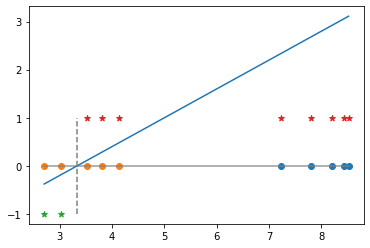

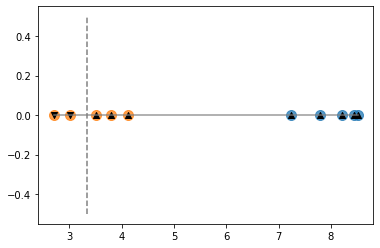

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from collections import Counter

#--- Obtenemos el conjunto de puntos y etiquetas ---
X, y = make_blobs(n_samples=10, 
                centers=2, 
				n_features=1,
                random_state=2809			
				)

counter = Counter(y)

#--- Definimos los parámetros de la frontera de decisión ---
w = 0.5      # peso 
w_0 = -3     # sesgo

#--- Obtener el máximo y mínimo del conjunto X ---
a = min(-w_0/w,np.min(X))
b = np.max(X)

x_line = np.linspace(a,b,num=10)
y_line = [w*x + w_0 for x in x_line]
signs_evals = np.sign([w*x + w_0 for x in X])  # f(g(x)) para cada x del conjunto X

#--- Graficar ---
plt.figure()
plt.plot([a,b],[0,0], color='gray',alpha=0.8) # Dibujar el eje horizontal
for label, _ in counter.items():  # Graficar cada etiqueta real de los puntos
    row_ix = np.where(y == label)[0]
    puntos = X[row_ix]
    plt.scatter(puntos,[0 for p in puntos])
for sign in [-1,1]:  # Graficar cada etiqueta predecida de los puntos
    row_ix = np.where(signs_evals == sign)[0]
    signos = signs_evals[row_ix]
    puntos = X[row_ix]
    plt.scatter(puntos,signos,marker='*')
plt.plot(x_line,y_line) # Graficar la frontera de decisión
plt.plot([-w_0/w,-w_0/w],[-1,1],color='gray',linestyle="dashed")
plt.show()

#--- Graficar ---
plt.figure()
plt.plot([a,b],[0,0], color='gray',alpha=0.8) # Dibujar el eje horizontal
for label, _ in counter.items():  # Graficar cada etiqueta real de los puntos
    row_ix = np.where(y == label)[0]
    puntos = X[row_ix]
    plt.scatter(puntos,[0 for p in puntos],alpha=0.75,s=100)
signos = ['v','^']
for signo,sign in zip(signos,[-1,1]):  # Graficar cada etiqueta predecida de los puntos
    row_ix = np.where(signs_evals == sign)[0]
    signos = signs_evals[row_ix]
    puntos = X[row_ix]
    plt.scatter(puntos,[0 for p in puntos],marker=signo,color='black')
# plt.plot(x_line,y_line) # Graficar la frontera de decisión
plt.plot([-w_0/w,-w_0/w],[-0.5,0.5],color='gray',linestyle="dashed")
plt.show()

# Mínimos cuadrados para la clasificación

* Podemos usar Mínimos Cuadrados (*Ordinary Least Squares*, OLS) como una herramienta de clasificación.
* Cada clase $\mathcal{C}_j$ se describe por su propio modelo lineal:

$$
y_j(\textrm{x})=\textrm{w}^\textrm{T}_j\textrm{x}+w_{j,0}
$$
&emsp;&ensp;&nbsp; donde $j=1,\ldots,k$. Podemos agrupar los términos como:

$$
\mathbf{y}(\textrm{x})=\mathbf{\tilde{W}}^\textrm{T} \tilde{\textrm{x}}
$$

* Para encontrar $\mathbf{\tilde{W}}$ podemos minimizar la suma de los residuales al cuadrado como se hizo en el Módulo anterior.

* Consideremos un conjunto de entrenamiento $\{\textrm{x}_n,t_n\}$, donde $n=1,\ldots,N$, definamos la matrices $\mathbf{t}$ y $X$ de la siguiente forma: 


* Como hemos visto, la solución para $\mathbf{\tilde{W}}$ está dada por:
$$
\mathbf{\tilde{W}}=(\mathbf{\tilde{X}}^\textrm{T}\mathbf{\tilde{X}})^{-1}\mathbf{\tilde{X}}^{\textrm{T}}\mathbf{t}=\mathbf{\tilde{X}}^\dagger\mathbf{t}
$$
* La función discriminante que usamos para clasificar un conjunto de puntos definido por $Z$ es entonces:
$$
\textrm{y}(Z)=\tilde{Z}\mathbf{\tilde{W}}=\tilde{Z} \mathbf{\tilde{X}}^\dagger \mathbf{t}
$$

## Un ejemplo

Función para generar datos. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def genera_datos(add_outliers=False, add_class=False):
    x0 = np.random.normal(size=50).reshape(-1, 2) - 1
    x1 = np.random.normal(size=50).reshape(-1, 2) + 1.
    if add_outliers:
        x_out = np.random.normal(size=10).reshape(-1, 2) + np.array([5., 10.])
        return np.concatenate([x0, x1, x_out]), np.concatenate([np.zeros(25), np.ones(30)]).astype(int)
    if add_class:
        x2 = np.random.normal(size=50).reshape(-1, 2) + 3.
        return np.concatenate([x0, x1, x2]), np.concatenate([np.zeros(25), np.ones(25), 2 + np.zeros(25)]).astype(int)
    return np.concatenate([x0, x1]), np.concatenate([np.zeros(25), np.ones(25)]).astype(int)

Generamos y graficamos el conjunto de entrenamiento.

x_train:= [[-1.19045237  0.75889633]
 [-0.52930964 -1.40871404]
 [-0.94039748  1.76384321]
 [-2.51289248 -1.14460412]]
Shape: (50, 2)
y_train:= [0 0 0 0]
Shape: (50,)


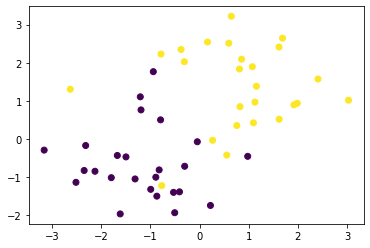

In [ ]:
x_train, y_train = genera_datos(add_outliers=False,add_class=False)
print('x_train:=',end=' ')
print(x_train[:4])
print(f"Shape: {x_train.shape}")
print('y_train:=',end=' ')
print(y_train[:4])
print(f"Shape: {y_train.shape}")

#--- Graficar ---
plt.figure()
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.show()

Generamos el conjunto de prueba

x1_test.shape=  (100, 100)
x_test.shape=  (10000, 2)


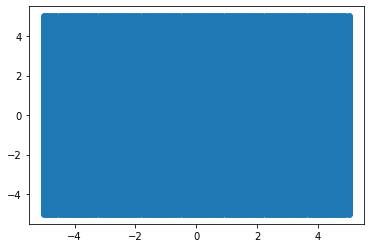

In [ ]:
size = 100

x1_test, x2_test = np.meshgrid(np.linspace(-5, 5, size), np.linspace(-5, 5, size))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

print('x1_test.shape= ',x1_test.shape)
print('x_test.shape= ',x_test.shape)

plt.figure()
plt.scatter(x_test[:, 0], x_test[:, 1])
plt.show()

In [ ]:
from sklearn import preprocessing

features = preprocessing.PolynomialFeatures(1)
X_train=features.fit_transform(x_train)
X_test=features.fit_transform(x_test)

print('X_train:=')
print(X_train[:3])
print('X_train.shape=',X_train.shape)

print('X_test:=')
print(X_test[:3],X_test.shape)

X_train:=
[[ 1.         -0.21607814 -3.21800764]
 [ 1.         -0.90924041 -1.51467346]
 [ 1.         -0.62621402 -2.13559861]]
X_train.shape= (50, 3)
X_test:=
[[ 1.        -5.        -5.       ]
 [ 1.        -4.8989899 -5.       ]
 [ 1.        -4.7979798 -5.       ]] (10000, 3)


In [ ]:
def encoderT(y:np.ndarray):
    K = np.max(y) + 1
    enc = np.eye(K)
    return enc[y]

T = encoderT(y_train)

print('T.shape= {}'.format(T.shape))
print(y_train[:3])
print(T[:3])

T.shape= (50, 2)
[0 0 0]
[[1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
"""----TU CODIGO AQUÍ---------"""
W = np.linalg.pinv(X_train)@T
"""----------------------------"""

print('W:=')
print(W)
print('\nW.shape={}'.format(W.shape))

W:=
[[ 0.53494362  0.46505638]
 [-0.15403701  0.15403701]
 [-0.18044605  0.18044605]]

W.shape=(3, 2)


In [ ]:
y_x = X_test@W
y = np.argmax(y_x,axis=1)
print(y,y.shape)

[0 0 0 ... 1 1 1] (2500,)


Juntamos todo lo anterior en una clase. Esta clase es la implementación del clasificador de mínimos cuadrados.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

class LeastSquaresClassifier():
    def __init__(self, W:np.ndarray=None):
        '''
        W es la matriz de pesos, la cual puede ser especificada desde un principio, esto
        es opcional.
        '''
        self.W = W

    def fit(self, X:np.ndarray, y:np.ndarray):
        '''
        Este método calcula la matriz de pesos para la matriz de puntos "aumentada" X
        y el conjunto de etiquetas y.
        '''
        def encoderT(y:np.ndarray):
            K=np.max(y) + 1
            enc=np.eye(K)
            return enc[y]
        T = encoderT(y)
        self.W = np.linalg.pinv(X)@T
        
    def clasifica(self, X:np.ndarray):
        '''
        Este método predice las etiquetas para el conjunto de puntos X
        '''
        return np.argmax(X@self.W,axis=1)

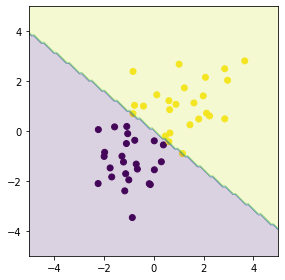

In [ ]:
x_train, y_train = genera_datos()
x1_test, x2_test = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

features = preprocessing.PolynomialFeatures(1)
X_train = features.fit_transform(x_train)
X_test = features.fit_transform(x_test)

"""----TU CODIGO AQUÍ---------"""
#CREA el objeto
modelo = LeastSquaresClassifier()
#ENTRENA el modelo
modelo.fit(X_train,y_train)
#PRUEBA el modelo
y = modelo.clasifica(X_test)
"""----------------------------"""

plt.figure()
#-----Dibuja los datos---------------------------------
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
#-----Dibuja X_test---------------------------------
plt.contourf(x1_test, x2_test, y.reshape(100, 100), alpha=0.2)
#-----Formato de la gráfica------------------------
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

Clasificamos un nuevo punto

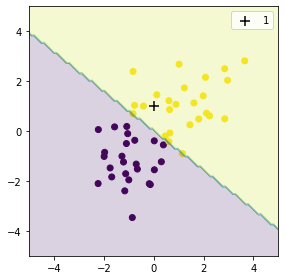

In [ ]:
new_x = np.array([[0,1]])

features = preprocessing.PolynomialFeatures(1)
X_new = features.fit_transform(new_x)

y_new = modelo.clasifica(X_new)

plt.figure()
#-----Dibuja los datos---------------------------------
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
#-----Dibuja X_test---------------------------------
plt.contourf(x1_test, x2_test, y.reshape(100, 100), alpha=0.2)
plt.scatter(new_x[:,0],new_x[:,1], c='black', marker='+',label=str(y_new[0]),s=100)
plt.legend()
#-----Formato de la gráfica------------------------
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

## Tarea

### En este ejercicio nos interesa observar el efecto de los outliers y de una tercera clase en el clasificador LS.

1. Efecto de outliers
   1. Genera un nuevo conjunto de datos de entrenamiento con outliers usando la función `genera_datos(add_outliers=True)`. A partir de este conjunto de datos puedes recuperar el conjunto de datos sin los outliers, los outliers son los últimos 5 puntos (renglones) de la matriz de coordenadas. 
   2. Tendrás dos conjuntos de entrenamiento, uno con los outliers y otro sin los outliers.
   3. Crea un clasificador para cada conjunto de datos y grafica la frontera de decisión en ambos casos.
   4. Compara las FD del primer modelo y de este segundo modelo graficando ambas en la misma figura (usando `contour` en lugar de `contourf`). Es posible que tengas que modificar los límites de graficación (x,y).
2. Efecto de 3 clases
   1. Genera otro conjunto de datos de entrenamiento con 3 clases usando la función `genera_datos(add_class=True)`; usa un meshgrid de -5 a 10.
   2. Crea un nuevo clasificador y entrénalo con estos datos de 3 clases.
   3. Prueba el clasificador con datos de Test y observa las FD (es posible que necesites ajustar los límites de los ejes (x,y)).
3. Concluye sobre las características de OLS como clasificador, ¿a qué crees que se deban estas características?